# 时序模式&代码实现

# ARIMA时序模型

In [5]:
import pandas as pd
discfile ='arima_data.xls'
forcastnum=5

In [6]:
discfile

'arima_data.xls'

In [7]:
data =pd.read_excel(discfile,index_col ='日期')

In [8]:
data

,销量
日期,
2015-01-01,3023
2015-01-02,3039
2015-01-03,3056
2015-01-04,3138
2015-01-05,3188
2015-01-06,3224
2015-01-07,3226
2015-01-08,3029
2015-01-09,2859


In [ ]:
#时序图

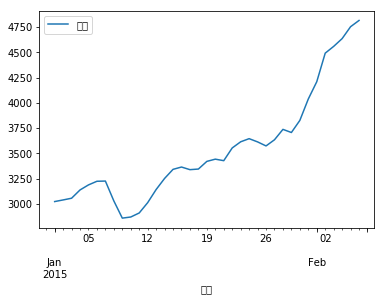

In [10]:
import matplotlib.pyplot as plt
fig=data.plot()
plt.show(fig)

In [ ]:
#自相关图

In [12]:
from  statsmodels.graphics.tsaplots import plot_acf

i:\python\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


i:\python\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


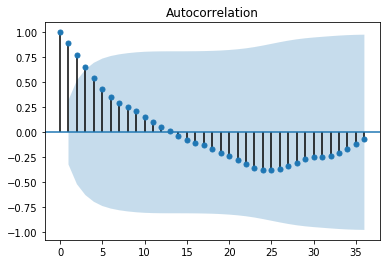

In [13]:
plot_acf(data).show()

In [14]:
#平稳性检测

In [16]:
from statsmodels.tsa.stattools import adfuller as ADF
print('原始序列的检验结果为：',ADF(data['销量']))

原始序列的检验结果为： (1.8137710150945272, 0.9983759421514264, 10, 26, {'1%': -3.7112123008648155, '5%': -2.981246804733728, '10%': -2.6300945562130176}, 299.46989866024177)


In [17]:
#差分后的结果

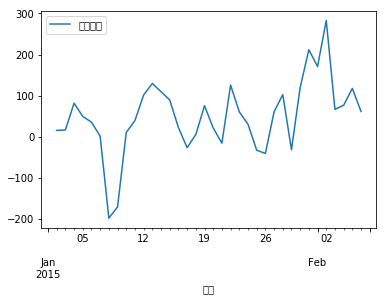

原始序列的检验结果为： (-3.1560562366723532, 0.02267343544004886, 0, 35, {'1%': -3.6327426647230316, '5%': -2.9485102040816327, '10%': -2.6130173469387756}, 287.5909090780334)


i:\python\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


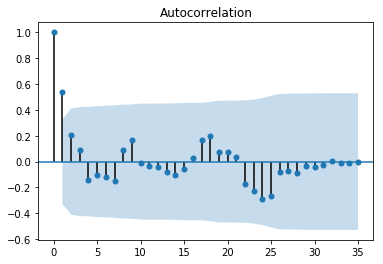

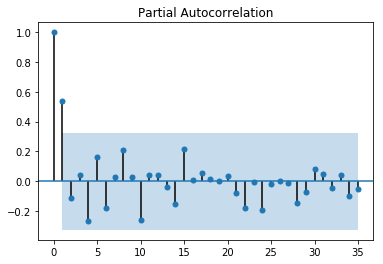

In [20]:
D_data =data.diff().dropna()
D_data.columns =['销量差分']
plt.show(D_data.plot())#时序图
plot_acf(D_data).show()#自相关图
from  statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(D_data).show()#偏自相关图
print('原始序列的检验结果为：',ADF(D_data['销量差分']))

In [22]:
#白噪声检验
from statsmodels.stats.diagnostic import acorr_ljungbox
print('差分序列的白噪声检验结果为',acorr_ljungbox(D_data,lags=1))

差分序列的白噪声检验结果为 (array([11.30402222]), array([0.00077339]))


In [40]:
from statsmodels.tsa.arima_model import ARIMA
data=data.astype(float)
pmax =int(len(D_data)/10)
qmax =int(len(D_data)/10)
bic_matrix =[]
for p in range(pmax+1):
    tmp=[]
    for q in range(qmax+1):
        try:
            tmp.append(ARIMA(data,(p,1,q)).fit().bic)
        except:
            tmp.append(None)
    print(tmp)
    bic_matrix.append(tmp)
    
bic_matrix =pd.DataFrame(bic_matrix)#从中可以找出最小值

i:\python\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
i:\python\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


[432.0684724517513, 422.51008220185264, 426.08891066689796, 426.595507415464]


i:\python\lib\site-packages\statsmodels\tsa\tsatools.py:654: RuntimeWarning: divide by zero encountered in true_divide
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
i:\python\lib\site-packages\statsmodels\tsa\tsatools.py:628: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
i:\python\lib\site-packages\statsmodels\tsa\tsatools.py:629: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
i:\python\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:654: RuntimeWarning: invalid value encountered in true_divide
  R_mat, T_mat)
i:\python\lib\site-packages\statsmodels\tools\numdiff.py:243: RuntimeWarning: invalid value encountered in add
  **kwargs)).imag/2./hess[i, j]
i:\python\lib\site-packages\statsmodels\tools\numdiff.py:243: RuntimeWarning: invalid value encountered in multiply
  **kwargs)).imag/2./hess[i, j]
i:\python\lib\site-packages\statsmodels\

[423.62827614899254, 426.07360131940226, nan, None]


i:\python\lib\site-packages\statsmodels\tools\numdiff.py:243: RuntimeWarning: invalid value encountered in subtract
  **kwargs)).imag/2./hess[i, j]
i:\python\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
i:\python\lib\site-packages\statsmodels\tsa\tsatools.py:584: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
i:\python\lib\site-packages\statsmodels\tsa\tsatools.py:585: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
i:\python\lib\site-packages\statsmodels\tsa\tsatools.py:585: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
i:\python\lib\site-packages\statsmodels\tsa\tsatools.py:586: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/
i:\python\lib\site-packages\statsmodels\tsa\tsatools.py:587: RuntimeWarning: overflow encountered in 

[426.7748237904199, 427.39582782007216, None, nan]
[430.31752435890104, None, None, 436.4781092315582]


In [37]:
bic_matrix

,0,1,2,3
0,432.068472,422.510082,426.088911,426.595507
1,423.628276,426.073601,NaN,NaN
2,426.774824,427.395828,NaN,NaN
3,430.317524,NaN,NaN,436.478109


In [39]:
#当p=0,q=1时有最小值，定阶完成

In [42]:
p,q =bic_matrix.stack().idxmin()

In [43]:
p,q

(0, 1)

In [44]:
bic_matrix.stack()

0  0    432.068472
   1    422.510082
   2    426.088911
   3    426.595507
1  0    423.628276
   1    426.073601
2  0    426.774824
   1    427.395828
3  0    430.317524
   3    436.478109
dtype: float64

In [46]:
model =ARIMA(data,(p,1,q)).fit()#建立ARIMA（0,1,1）模型

model.forecast(5)

i:\python\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
i:\python\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
i:\python\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


(array([4873.96657031, 4923.92272193, 4973.87887355, 5023.83502517,
        5073.79117679]),
 array([ 73.08574327, 142.32679131, 187.54280892, 223.80280345,
        254.95702478]),
 array([[4730.72114572, 5017.21199491],
        [4644.96733694, 5202.87810693],
        [4606.30172251, 5341.45602459],
        [4585.18959077, 5462.48045957],
        [4574.08459061, 5573.49776296]]))

In [47]:
len(data),len(D_data)

(37, 36)

In [48]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARIMA
====================================================================
Model:              ARIMA            BIC:                 422.5101  
Dependent Variable: D.销量             Log-Likelihood:      -205.88   
Date:               2018-03-27 17:05 Scale:               1.0000    
No. Observations:   36               Method:              css-mle   
Df Model:           2                Sample:              01-02-2015
Df Residuals:       34                                    02-06-2015
Converged:          1.0000           S.D. of innovations: 73.086    
AIC:                417.7595         HQIC:                419.418   
----------------------------------------------------------------------
               Coef.    Std.Err.     t      P>|t|     [0.025    0.975]
----------------------------------------------------------------------
const         49.9562    20.1390   2.4806   0.0182   10.4844   89.4279
ma.L1.D.销量     0.6710     0.1648   4.0712   0.0003    0.3480    0.9941
-----------------------------------------------------------------------------
                 Real           Imaginary          Modulus          Frequency
-----------------------------------------------------------------------------
MA.1           -1.4902             0.0000           1.4902             0.5000
====================================================================

"""